<a href="https://colab.research.google.com/github/Starignus/testing_langkit/blob/main/04_Trying_LangKit_LLM_to_WhyLabs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Investigating LangKit

[LangKit is an open-source](https://github.com/whylabs/langkit/tree/main) text metrics toolkit for monitoring language models. It offers an array of methods for extracting relevant signals from the input and/or output text, which are compatible with the open-source data logging library [whylogs](https://whylogs.readthedocs.io/en/latest/).

[LangKit can monitor and safeguard](https://whylabs.ai/blog/posts/langkit-making-large-language-models-safe-and-responsible) your LLMs by quickly detecting and preventing malicious prompts, toxicity, hallucinations, and jailbreak attempts. You can check the [metrics that covers](https://github.com/whylabs/langkit/blob/main/langkit/docs/modules.md).

First let's install the required libraries.

In [ ]:
!pip install transformers[torch]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 280.0/280.0 kB 2.9 MB/s eta 0:00:00


In [ ]:
!pip install huggingface-hub==0.20.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 330.3/330.3 kB 3.0 MB/s eta 0:00:00
  Attempting uninstall: huggingface-hub
    Found existing installation: huggingface-hub 0.20.3
    Uninstalling huggingface-hub-0.20.3:
      Successfully uninstalled huggingface-hub-0.20.3


In [ ]:
!pip install bigframes==0.18.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 411.8/411.8 kB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 19.9 MB/s eta 0:00:00
  Attempting uninstall: bigframes
    Found existing installation: bigframes 0.21.0
    Uninstalling bigframes-0.21.0:
      Successfully uninstalled bigframes-0.21.0


In [ ]:
!pip install torch

In [ ]:
! pip install datasets==2.16.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 507.1/507.1 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 18.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 17.8 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of multiprocess to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 19.3 MB/s eta 0:00:00


In [ ]:
# Note: you may need to restart the kernel to use updated packages.
!pip install langkit[all]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.1/105.1 kB 16.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 32.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 11.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 65.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.4/139.4 kB 16.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.7/226.7 kB 28.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 12.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.8/132.8 kB 16.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 21.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 101.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.9/75.9 kB 11.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━

# [Writing Profiles to WhyLabs](https://github.com/whylabs/langkit/blob/main/langkit/examples/LLM_to_WhyLabs.ipynb)

 🚩 *Create a free WhyLabs account to complete this example*
 * You can store, visualize, and monitor whylogs profiles with the [WhyLabs Observability Platform](https://whylabs.ai/whylabs-free-sign-up?utm_source=github&utm_medium=referral&utm_campaign=langkit)? Sign up for a [free WhyLabs account](https://whylabs.ai/whylogs-free-signup?utm_source=github&utm_medium=referral&utm_campaign=LLM_to_WhyLabs).


In this example, it will be shown how to send your LLM metrics to your monitoring dashboard at WhyLabs Platform. We will:

* Define environment variables with the appropriate Credentials and IDs
* Log LLM prompts and responses into a profile
* Use a whylogs telemetry agent to gather statistics on the prompts/response and send these to WhyLabs
* View the systematic telemetry on your LLM in WhyLabs.

Note: If you don't want to bother with setting up your credentials or running live LLM interactions? We've already done it for you and uploaded LangKit telemetry from prompt/response LLM interactions to a public guest session in WhyLabs, no login required you can just click [here.](https://hub.whylabsapp.com/resources/demo-llm-chatbot/columns/prompt.sentiment_nltk?dateRange=2023-06-08-to-2023-06-09&sortModelBy=LatestAlert&sortModelDirection=DESC&targetOrgId=demo&sessionToken=session-8gcsnbVy&startDate=2023-06-08&endDate=2023-06-09&limit=38&offset=0)

## Setting the Environment Variables
In order to send our profile to WhyLabs, let's first set up an account. You can skip this if you already have an account and a model set up.

We will need three pieces of information:

* API tokens for the LLM and WhyLabs
* Organization ID for WhyLabs
* Dataset ID for WhyLabs
* Go to https://whylabs.ai/free and grab a free account. You can follow along with the examples if you wish, but if you’re interested in only following this demonstration, you can go ahead and skip the quick start instructions.

After that, you’ll be prompted to create an API token. Once you create it, copy and store it locally. The second important information here is your org ID. Take note of it as well. After you get your API Token and Org ID, you can go to https://hub.whylabsapp.com/models to see your projects dashboard. You can create a new project and take note of it's ID (if it's a model project it will look like model-xxxx).

We'll now check if the required credentials are set as environment variables. In a production setting these would already be set as environment variables, but here we prompt you if they are missing. You can still run the example without these, but we won't use a live session with GPT.

In [ ]:
from langkit.config import check_or_prompt_for_api_keys
from langkit.openai import ChatLog, send_prompt

check_or_prompt_for_api_keys()

Enter your WhyLabs Org ID
org-tYfbuJ
Enter your WhyLabs Dataset ID
model-5
Enter your WhyLabs API key
··········
Using API Key ID:  sO9o6yBJsi
Enter your OPENAI_APIKEY
··········
OPENAI_API_KEY set!


Since I do not have OpenAI keys I won't be able to run the notebook, but I will writte some notes and code from the example notebook.

## Profiling the Data

For demonstration, let's use some archived chat gpt response/prompts data from Hugging Face, or you can set the interactive parameter to true and interact with ChatGPT to see how it works in real time if you already have an openai api key.

In [ ]:
import os
from langkit.whylogs.rolling_logger import RollingLogger

telemetry_agent = RollingLogger()

INTERACTIVE = bool(os.getenv("OPENAI_API_KEY")) # set to True to test out interacting with ChatGPT
interactive_prompt = ""
if INTERACTIVE:
    print(f"At any time input 'q' or anything that begins with q to quit. enter a question for the LLM")
    while True:
        print()
        interactive_prompt = input("ask chat gpt: ")
        if interactive_prompt.startswith('q'):
            break
        response = send_prompt(interactive_prompt)
        # use the agent to log a dictionary, these should be flat
        # to get the best results, in this case we log the prompt and response text
        telemetry_agent.log(response.to_dict())
        print(response.to_dict(), flush=True)
else:
    from datasets import load_dataset

    archived_chats = load_dataset('alespalla/chatbot_instruction_prompts', split="test", streaming=True)
    chats = iter(archived_chats)
    for _ in range(100):
      response = next(chats)
      telemetry_agent.log(response)
      print(response)
    print("done profiling")


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/torch/_utils.py:831: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()


tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/403 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/704 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/268M [00:00<?, ?B/s]

⚠️ Initializing default session because no session was found.
Initializing session with config /root/.config/whylogs/config.ini

✅ Using session type: LOCAL. Profiles won't be uploaded or written anywhere automatically.
At any time input 'q' or anything that begins with q to quit. enter a question for the LLM



KeyboardInterrupt: Interrupted by user

In [ ]:
# In practice you can use context manager lifecycle events to automatically close
# loggers, this helps trigger a write ahead of schedule to avoid truncating the last interval
# data seen by the agent.
telemetry_agent.close()

# A Look on the Other Side
Now, check your dashboard to verify everything went ok. At the Profile tab, you should see something like this:

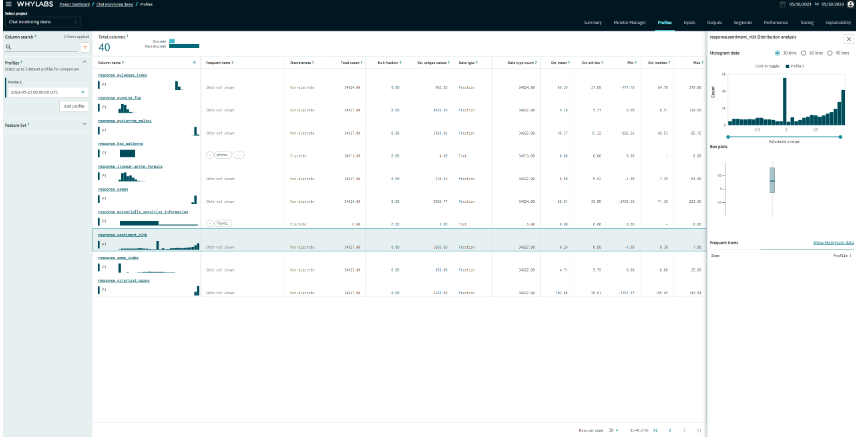

We can visualise every metric to change over time with details in the telemnetry section.

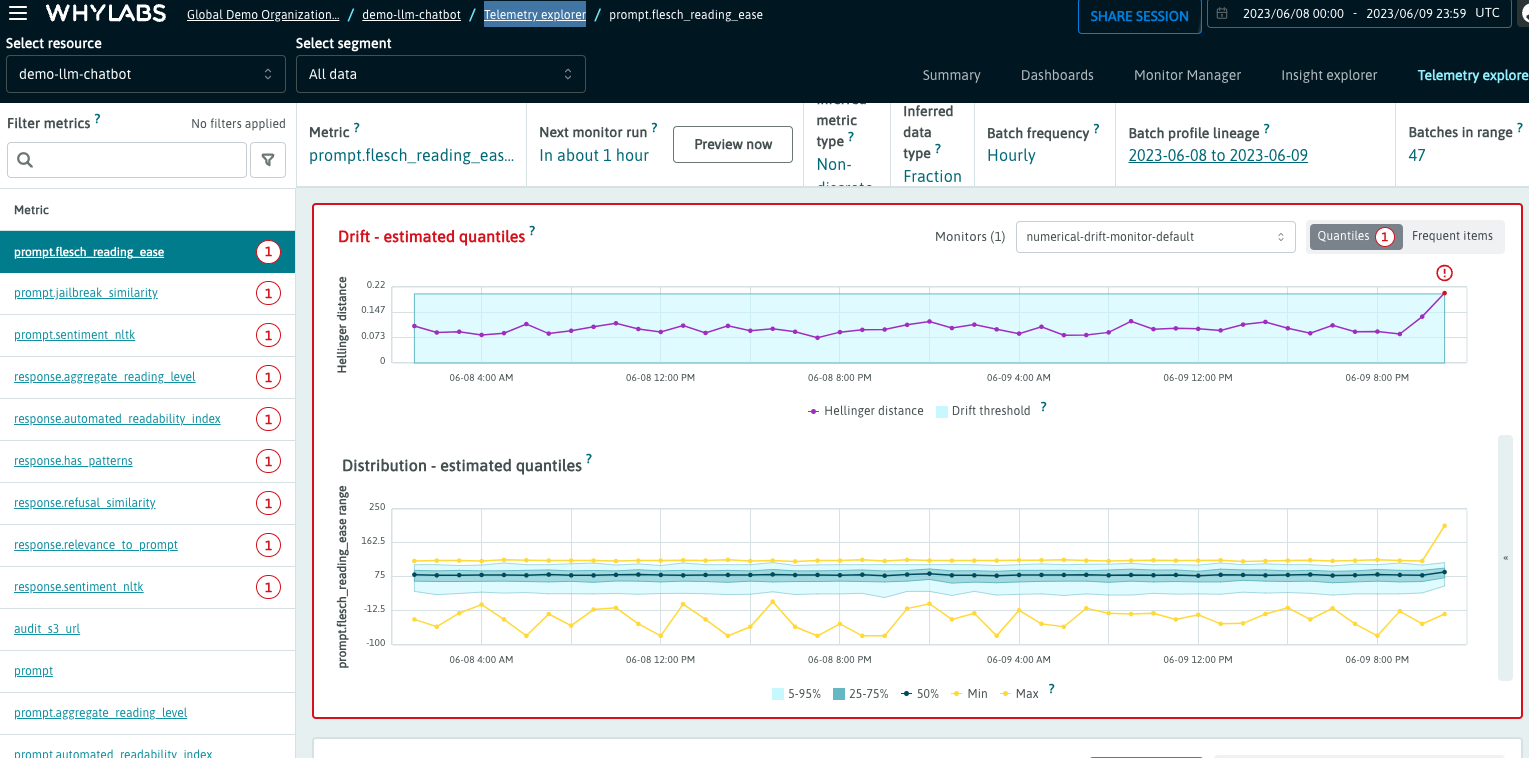

Or you can see the general view of the whole mentrics

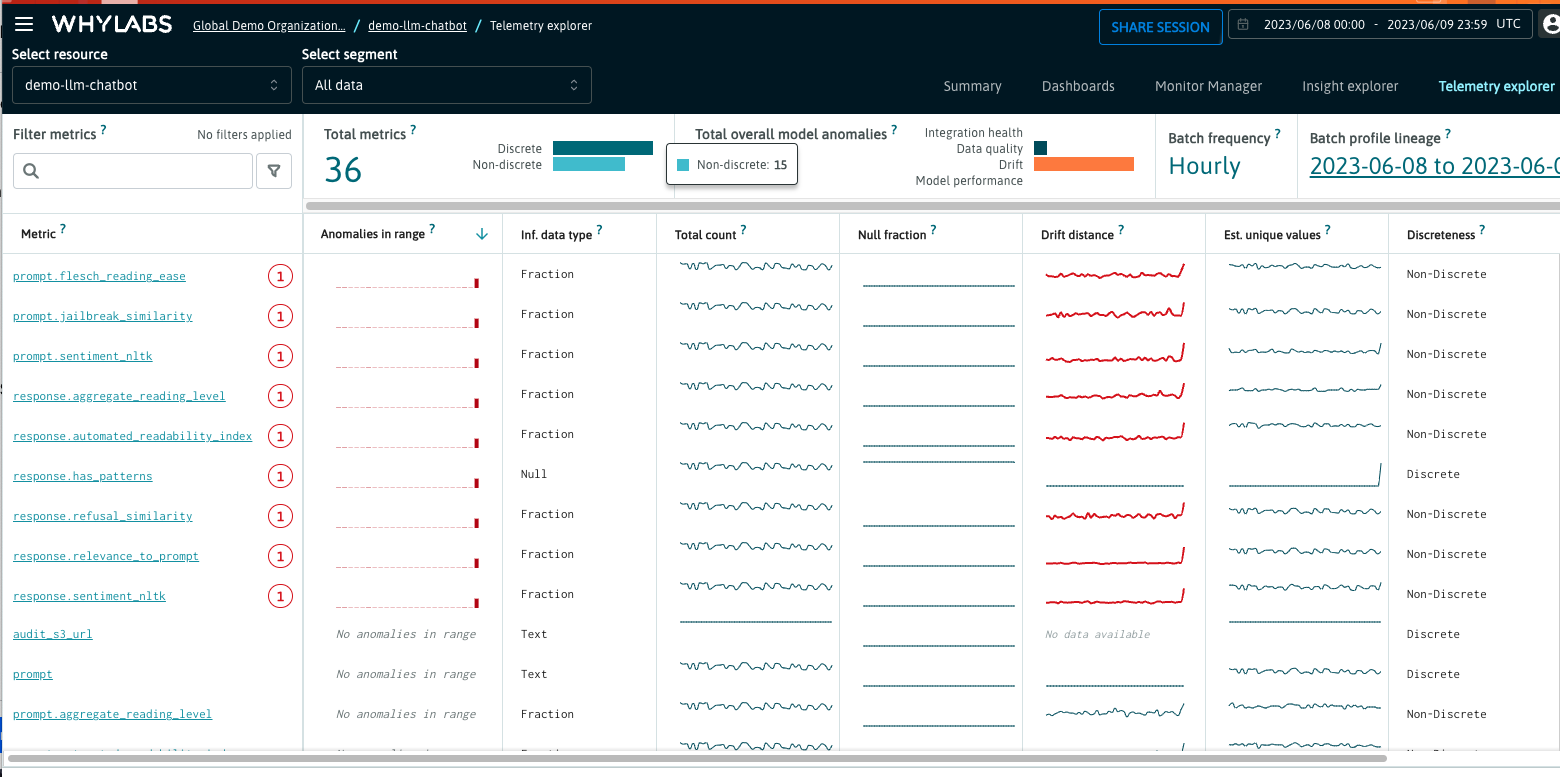

This is the dashboard to access the diferent sections. The Telemetry Health is what we saw above in the screenshoots.

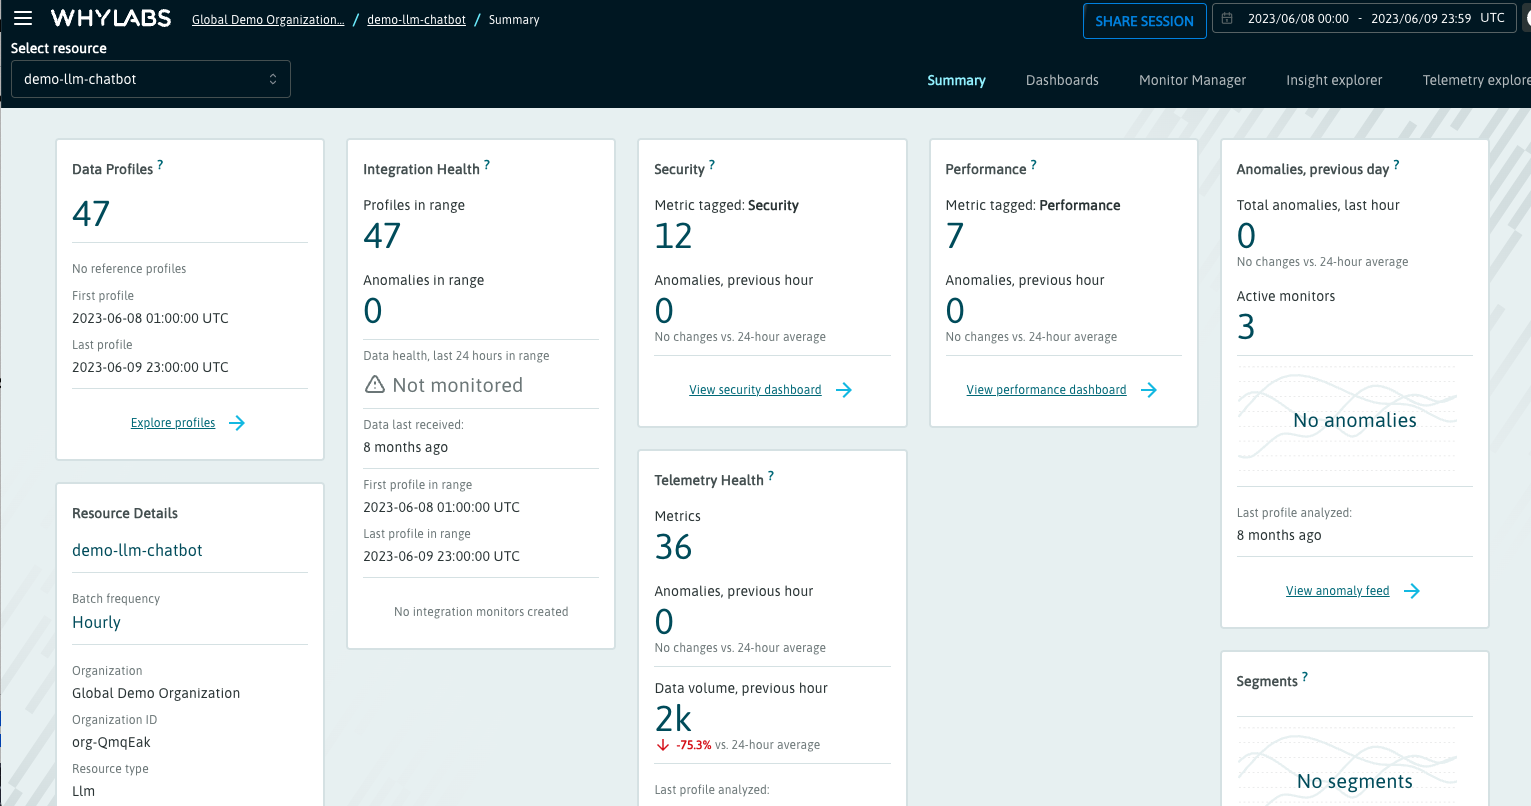

The data profiler let us have a look at the statistics of the metrics.

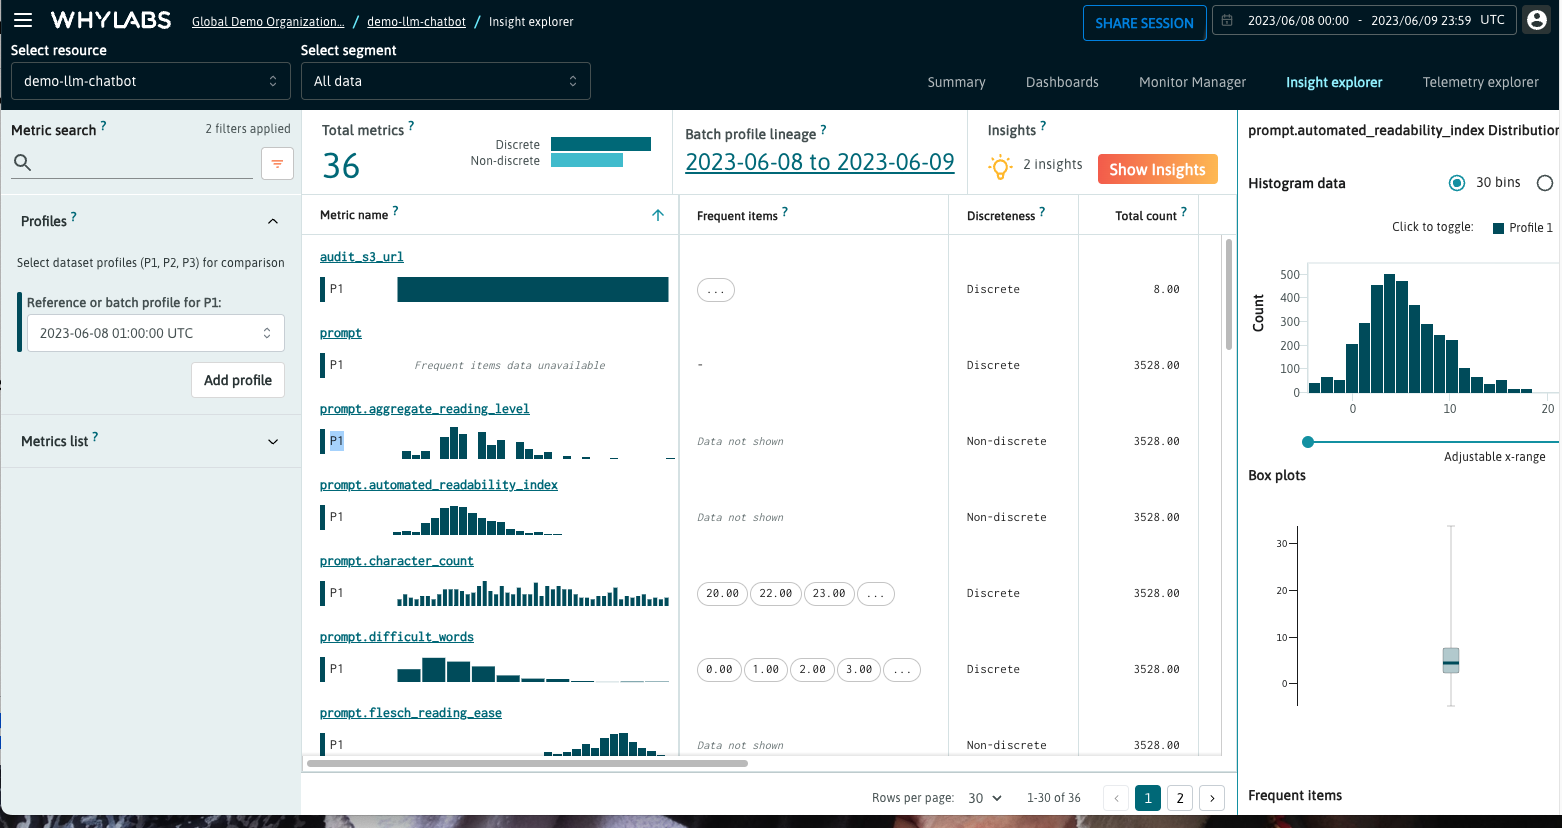

Showing the Insights

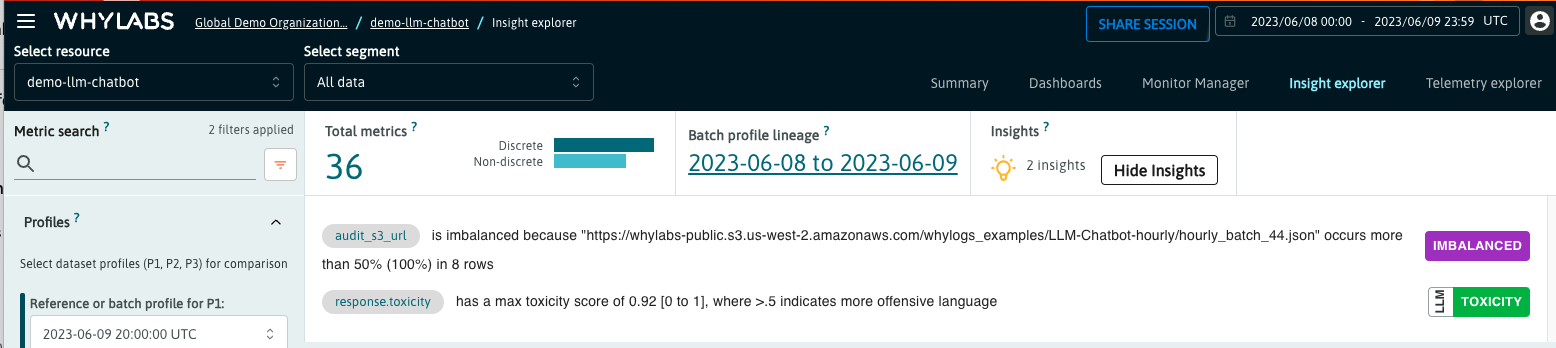[link text](https://)

The security details and anomaly detection on the metrics.

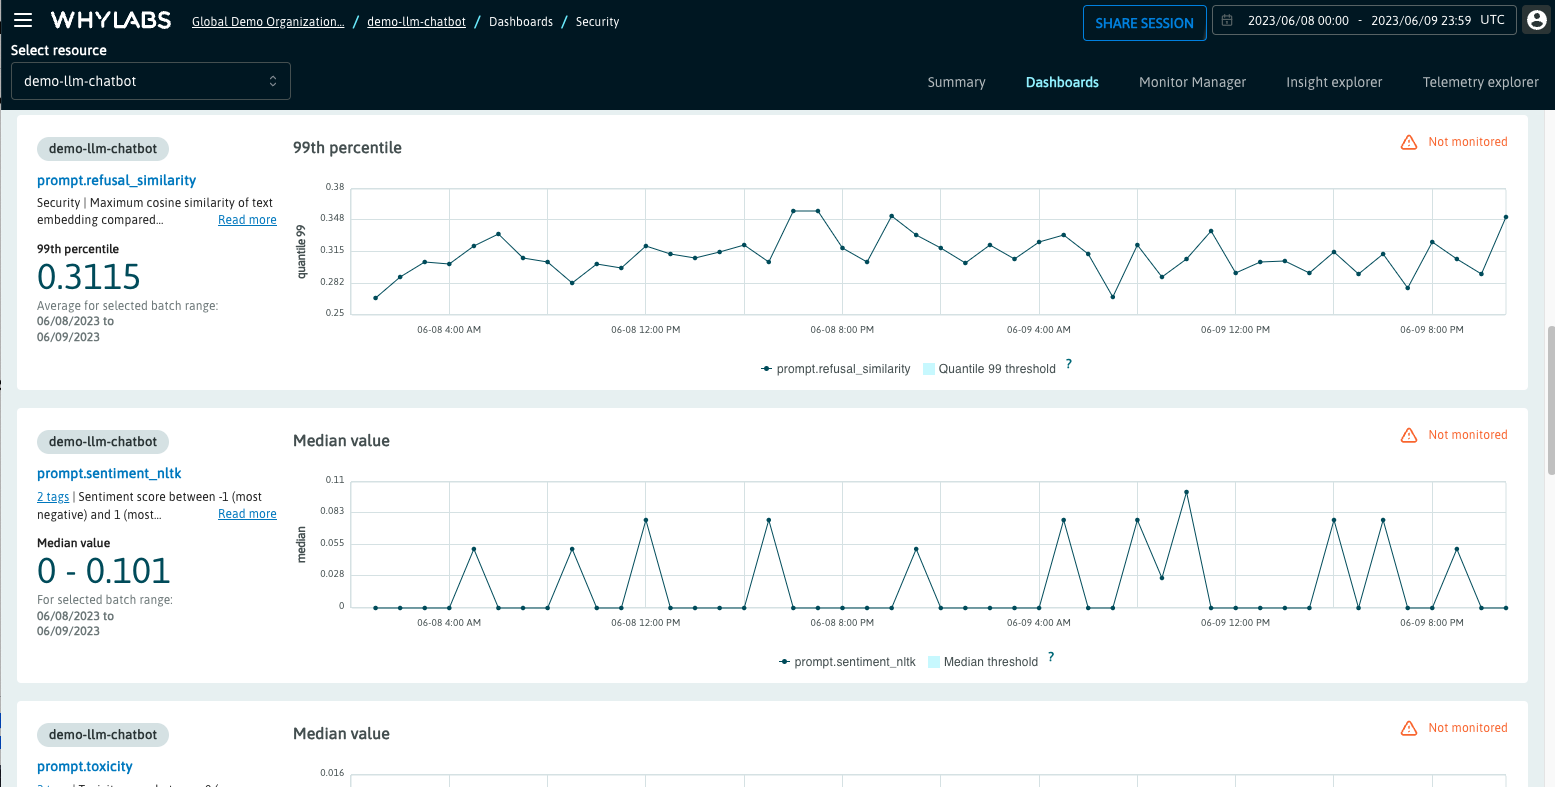

The Performance details and anomaly detection of the metrics.

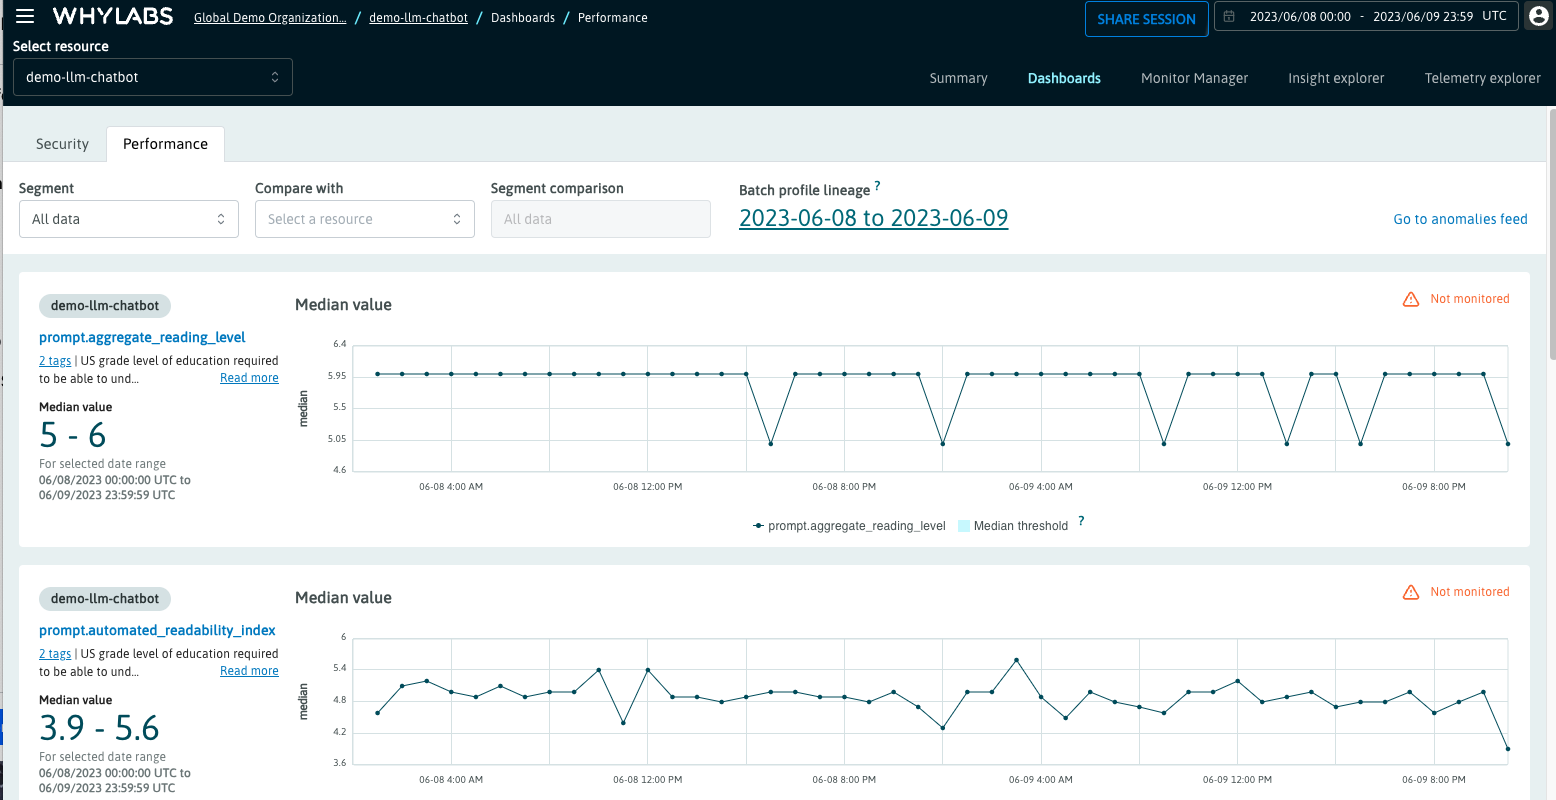

Anomalies feed

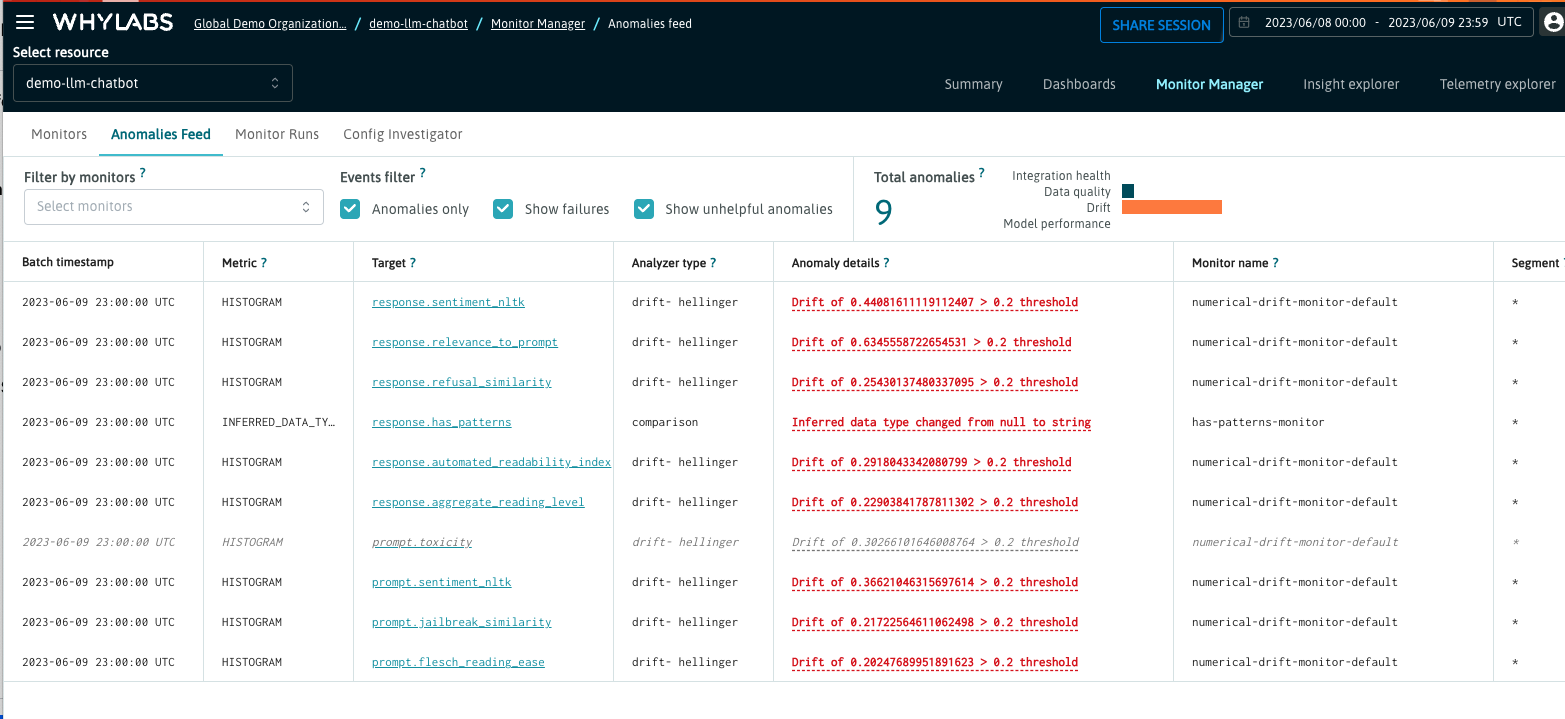

Monitor manager

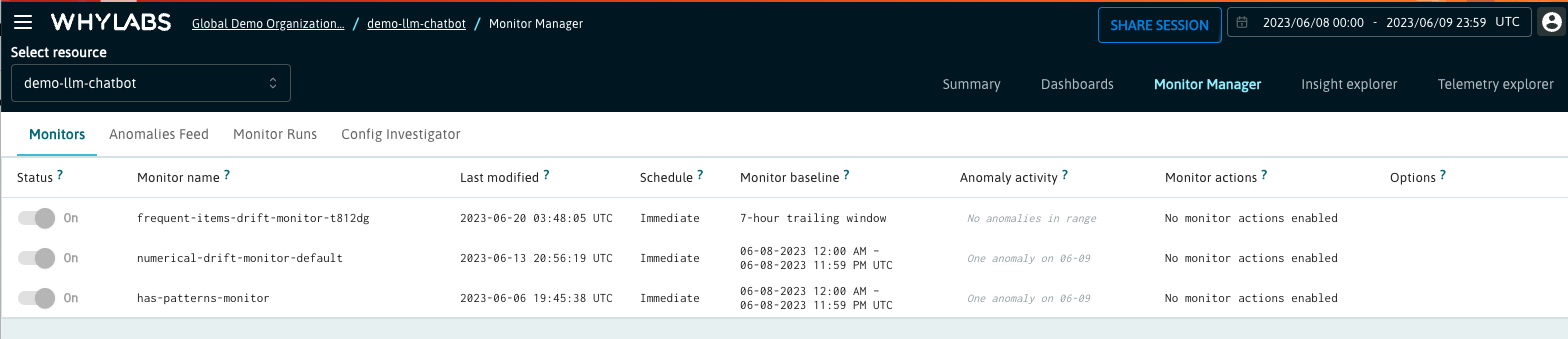

Resorces detailed

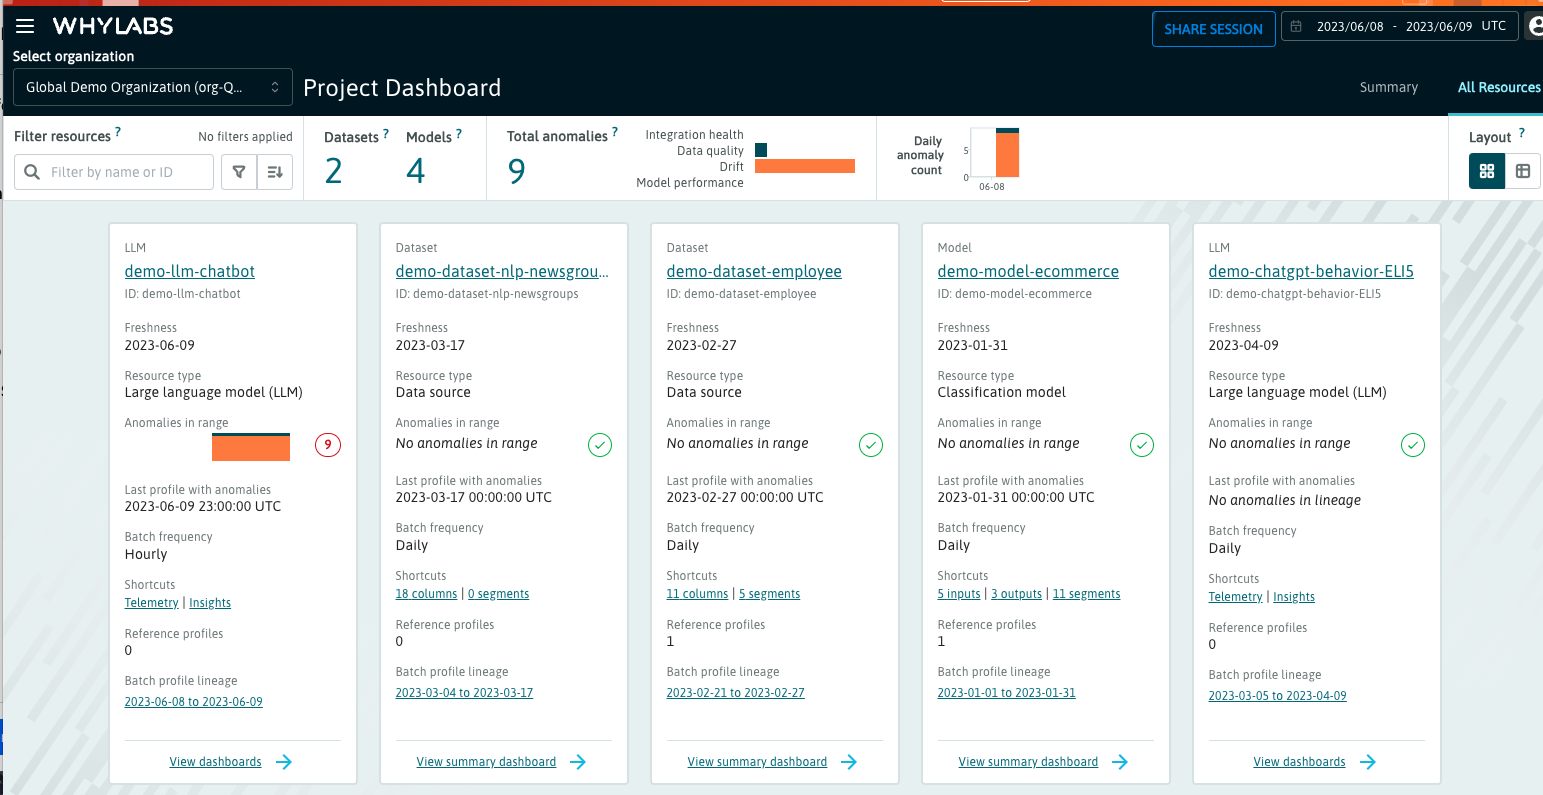

Non detailed

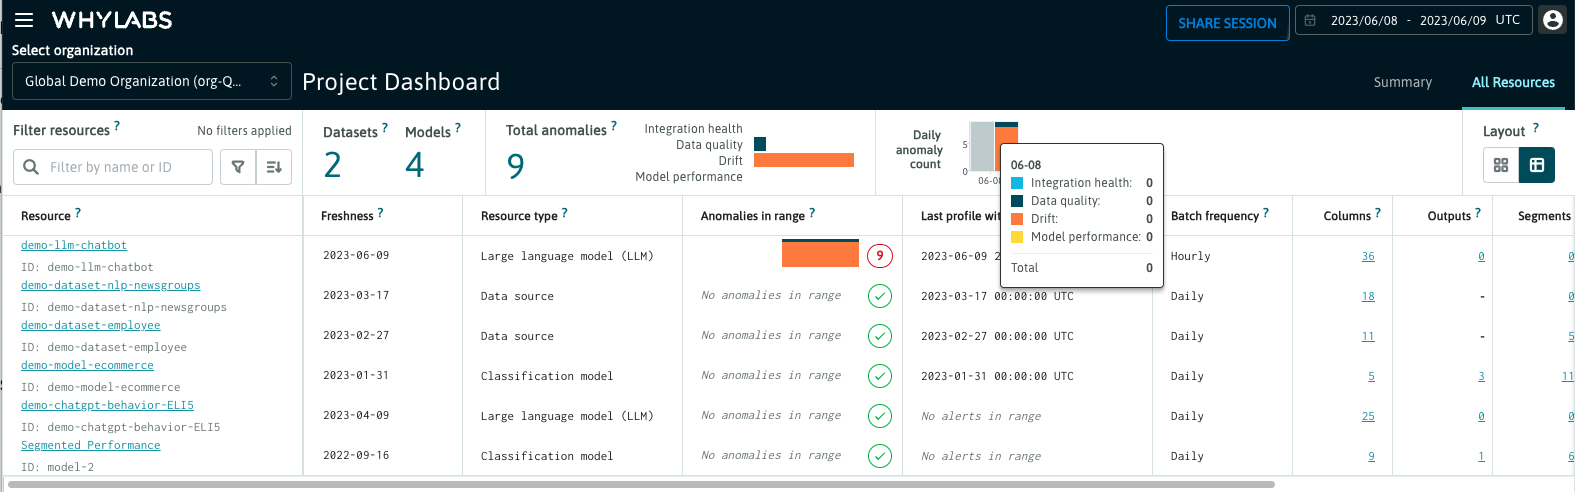

This should give you a quick way to look at how your extracted metrics on the text prompts and responses, and these can be monitored over time!